<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/M%C3%A9todo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Box - Muller
**Box y Muller (1958)**

El método comienza con dos variables alaetorias independientes $U_1$ y $U_2$, que siguen una distribución uniforme en el intervalo $(0,1)$

Donde se generan valores aleatorios uniformemente distribuidos entre 0 y 1

Las variables normales $X_1$ y $X_2$ se generan mediante las transformaciones:

$$
X_1 = \sqrt{-2logU_1}\cdot cos(2\pi U_2)
$$

$$
X_2 = \sqrt{-2logU_1}\cdot sin(2\pi U_2)
$$

$R$ calcula el término $\sqrt{-2log_eU_1}$ y luego se multiplica por las funciones trigonométricas para obtener $X_1$ y $X_2$

Indpendencia de $X_1$ y $X_2$ estas son variables aleatorias independientes y normalmente distribuidas con media $0$ y varianza $1$. Esto se debe a que la densidad conjutna de $X_1$ y $X_2$ es el producto de dos densidades normales estándar independientes:

$$
f(X_1, X_2) = \frac{1}{2\pi}e^{-\frac{X_1^2 + X_2^2}{2}} = \frac{1}{\sqrt{2\cdot \pi}}e^{-\frac{X_1^2}{2}}\cdot \frac{1}{\sqrt{2\cdot\pi}}e^{-\frac{X_2^2}{2}} = f(X_1)f(X_2)
$$
Lo cual demuestra que $X_1$ y $X_2$ son independientes y siguen una distribución normal estándar.

El método se basa en que la densidad $F(X_1, X_2)$ es constante en círculos, por lo que $\theta = arctan(\frac{X_2}{X_1})$ se distribuye uniformemente en $(0,2\pi)$. Además el cuadrado de la longitud del vector $r^2 = X_1^2 + X_2^2$ sigue una distribucion chi-cuadrada con dos grados de libertad. Si $U$ tiene una densidad rectangualr en $(0,1)$, entonces -2log_e$U$ sigue yba distribución chi-cuadrado con dos grados
de libertad.

En el código, los valores generados $x$ y $y$ se agregan a una lista, que continen los valores normales generados, los cuales se generan grandes cantidades de numeros normales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random


In [2]:

def box_muller(n):
    lista=[]  #Inicialización de lista
    for i in range(n): #Bucle para generar n pares de normales
      u1 = random() #U1 variable aleatoria independiente con distribución uniforme
      u2 = random() #U2 variable aleatoria independiente con distribución uniforme
      R = np.sqrt(-2*np.log(u1))  #Se aplica la transformación paraconvertir U1 en una variable con distribución exponencial
      x = R*np.cos(2*np.pi*u2) #Se convierten las coordenadas polares en cordenadas cartesianas
      y = R*np.sin(2*np.pi*u2)
      lista.append(x) #Se guardan los valores generados x en la lista
      lista.append(y) #Se guardan los valores generados y en la lista

    return lista

In [3]:
a = box_muller(100000) #Genera 100,000 pares de números aleatorios normales estándar

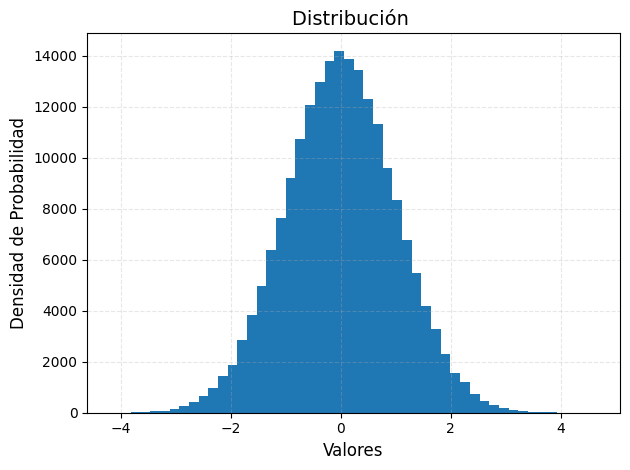

In [4]:
# Se grafica en un histograma
plt.hist(a, bins = 50)
plt.title('Distribución ', fontsize=14)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Media teórica
$$E[X] = 0$$

Cada valor generado $x$ o $y$ tienen una media poblacional igual a 0

In [5]:
#Se simula la media
np.mean(a) #Se imprime la media

np.float64(0.0013087610798170166)

# Varianza teórica

$$
Var(X) = 1
$$
La varianza de cada variable generada es exactamente 1

In [6]:
#Se simula la varianza
np.var(a) #Se imprime la varianza

np.float64(1.0007643047135406)

#Desviación estándar teórica

$$
\sigma = \sqrt{\sigma^2} = \sqrt{1} = 1
$$

In [7]:
#Se simula la desviación estándar
np.std(a) #Se imprime la desviación

np.float64(1.00038207936445)